<a href="https://colab.research.google.com/github/Aaryaveerkrishna23/Crater-s-Age-detection-/blob/main/implementation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Lunar_age detection/data1.csv')

In [ ]:
df_raw=df

In [ ]:
df.head()

,1. Crater name,2. Diameter [km],3. Latitude [°],4. Longitude [°],5. East longitude [°],6. Radius [km],7. Radius [m],8. Apparent diameter [km],9. Transient cavity diameter [km],10. Transient cavity diameter [km],11. Floor diameter [km],12. Measured rim to floor depth [km],13. Rim to floor depth [km],14. Apparent depth [km],15. Transient cavity depth [km],16. Interior volume [km^3],17. Rim height [km],18. Rim flank width [km],19. Measured height of central peak [km],20. Height of central peak [km],21. Diameter of central peak [km],22. Basal area of central peak [km^2],23. Maximum diameter of ejecta blocks [km],24. Maximum diameter of ejecta blocks [km],25. Thickness of ejecta in the distance equal to one radius [m],26. Thickness of ejecta in the distance equal to two radii [m],27. Thickness of ejecta in the distance equal to three radii [m],28. Thickness of ejecta in the distance equal to four radii [m],29. Thickness of ejecta in the distance equal to five radii [m],"30. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","31. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","33. Thickness of ejecta in the distance of 10,000 m outside the rim [m]",34. Radial distance of continuous ejecta [km],35. Radial distance of continuous ejecta [km],36. Radius of ejecta blanket thicker than 10 m [km],37. Radius of ejecta blanket thicker than 10 m [km] minimum,38. Radius of ejecta blanket thicker than 10 m [km] best estimate,39. Radius of ejecta blanket thicker than 10 m [km] maximum,40. Radius of radar-bright halo [km],...,43. Measured radius of radar-dark halo [km],44. Depth of excavation [km],45. Depth of excavation [km],46. Depth of melting [km],47. Depth of melting [km],48. Melt volume [km^3],"49. Melt volume, 45° on basalt [km^3]","50. Melt volume, 45° on anorthosite [km^3]",51. Age,52. Age class,53. Remarks,54. Age - source,55. Age - other sources,56. Basin age group,"57. Citation for first mention, citation for nomenclature from",58. Approval,59. Peak lithology,60. Ol [vol.-%],61. Opx [vol.-%],62. Cpx [vol.-%],63. Plg [vol.-%],64. Mafics/Plg,65. Opx/Cpx,66. Plg [wt.-%],67. Ol [wt.-%],68. Opx [wt.-%],69. Cpx [wt.-%],70. FeO [wt.-%],71. Peak lithologies,72. Setting,73. Average CF [μm],74. Average OMAT,75. Average FeO [wt.-%],76. OMAT range,77. Plg abundance class,78. Province,79. Peak degradation,80. PAN location,81. Rays,1. Crater name .1
0,Abbe,63.98,-57.58,174.77,174.77,32.0,31990,55.02,51.47,37.37,33.70,NaN,3.65,2.732,17.16,3536.22,1.24,15.11,NaN,0.00,14.00,81.19,0.155,0.465,301.88,37.74,11.18,4.72,2.42,133.49,482.60,527.23,466.80,76.69,61.61,152.88,84.69,99.61,125.01,86.94,...,NaN,5.74,5.15,9.60,10.05,551.77,187.0,428.9,Nectarian,2.0,NaN,PC,NaN,NaN,IAU1970,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abbe
1,Abbe H,25.13,-58.44,177.58,177.58,12.6,12565,21.61,23.26,15.60,10.49,NaN,2.76,1.904,7.75,408.34,0.85,6.92,NaN,0.34,3.94,10.49,0.084,0.251,151.18,18.90,5.60,2.36,1.21,26.10,136.76,149.83,71.59,29.95,24.75,53.96,27.30,31.07,37.24,32.21,...,NaN,0.00,2.33,0.00,3.60,25.92,8.8,20.1,NaN,NaN,NaN,NaN,NaN,NaN,AW82,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abbe H
2,Abbe K,26.10,-59.82,176.86,176.86,13.1,13050,22.45,24.02,16.17,11.00,NaN,2.79,1.926,8.01,445.67,0.87,7.14,NaN,0.37,4.19,11.39,0.086,0.257,155.48,19.44,5.76,2.43,1.24,28.22,145.62,159.52,78.15,31.12,25.68,56.29,28.58,32.57,39.11,33.54,...,NaN,0.00,2.40,0.00,3.75,29.34,9.9,22.8,NaN,NaN,NaN,NaN,NaN,NaN,AW82,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abbe K
3,Abbe M,28.61,-61.75,175.24,175.24,14.3,14305,24.60,25.97,17.61,12.33,NaN,2.86,1.980,8.66,550.98,0.90,7.71,NaN,0.44,4.84,13.93,0.091,0.274,166.41,20.80,6.16,2.60,1.33,33.93,168.84,184.90,96.25,34.13,28.09,62.35,31.94,36.52,44.05,36.97,...,NaN,2.89,2.60,2.86,4.

In [ ]:
df.columns

Index(['1. Crater name ', '2. Diameter [km]', '3. Latitude [°]',
       '4. Longitude [°]', '5. East longitude [°]', '6. Radius [km]',
       '7. Radius [m]', '8. Apparent diameter [km]',
       '9. Transient cavity diameter [km]',
       '10. Transient cavity diameter [km]', '11. Floor diameter [km]',
       '12. Measured rim to floor depth [km]', '13. Rim to floor depth [km]',
       '14. Apparent depth [km]', '15. Transient cavity depth [km] ',
       '16. Interior volume [km^3]', '17. Rim height [km]',
       '18. Rim flank width [km]', '19. Measured height of central peak [km]',
       '20. Height of central peak [km]', '21. Diameter of central peak [km]',
       '22. Basal area of central peak [km^2]',
       '23. Maximum diameter of ejecta blocks [km]',
       '24. Maximum diameter of ejecta blocks [km] ',
       '25. Thickness of ejecta in the distance equal to one radius [m] ',
       '26. Thickness of ejecta in the distance equal to two radii [m]',
       '27. Thickness of ej

In [ ]:

y=df['52. Age class']

In [ ]:



df=df.dropna(axis=1)

In [ ]:
df.columns

Index(['1. Crater name ', '2. Diameter [km]', '3. Latitude [°]',
       '4. Longitude [°]', '5. East longitude [°]', '6. Radius [km]',
       '7. Radius [m]', '8. Apparent diameter [km]',
       '9. Transient cavity diameter [km]',
       '10. Transient cavity diameter [km]', '11. Floor diameter [km]',
       '13. Rim to floor depth [km]', '14. Apparent depth [km]',
       '15. Transient cavity depth [km] ', '16. Interior volume [km^3]',
       '17. Rim height [km]', '18. Rim flank width [km]',
       '20. Height of central peak [km]', '21. Diameter of central peak [km]',
       '22. Basal area of central peak [km^2]',
       '23. Maximum diameter of ejecta blocks [km]',
       '24. Maximum diameter of ejecta blocks [km] ',
       '25. Thickness of ejecta in the distance equal to one radius [m] ',
       '26. Thickness of ejecta in the distance equal to two radii [m]',
       '27. Thickness of ejecta in the distance equal to three radii [m]',
       '28. Thickness of ejecta in the dist

In [ ]:
df=df.drop(['3. Latitude [°]',
       '4. Longitude [°]', '5. East longitude [°]'],axis=1)

In [ ]:





df=df.drop(['1. Crater name .1','1. Crater name '],axis=1)

In [ ]:
df['y']=y


In [ ]:
df=df.dropna()
df=df.drop('y',axis=1)

In [ ]:
df

,2. Diameter [km],6. Radius [km],7. Radius [m],8. Apparent diameter [km],9. Transient cavity diameter [km],10. Transient cavity diameter [km],11. Floor diameter [km],13. Rim to floor depth [km],14. Apparent depth [km],15. Transient cavity depth [km],16. Interior volume [km^3],17. Rim height [km],18. Rim flank width [km],20. Height of central peak [km],21. Diameter of central peak [km],22. Basal area of central peak [km^2],23. Maximum diameter of ejecta blocks [km],24. Maximum diameter of ejecta blocks [km],25. Thickness of ejecta in the distance equal to one radius [m],26. Thickness of ejecta in the distance equal to two radii [m],27. Thickness of ejecta in the distance equal to three radii [m],28. Thickness of ejecta in the distance equal to four radii [m],29. Thickness of ejecta in the distance equal to five radii [m],"30. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","31. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]","33. Thickness of ejecta in the distance of 10,000 m outside the rim [m]",34. Radial distance of continuous ejecta [km],35. Radial distance of continuous ejecta [km],36. Radius of ejecta blanket thicker than 10 m [km],37. Radius of ejecta blanket thicker than 10 m [km] minimum,38. Radius of ejecta blanket thicker than 10 m [km] best estimate,39. Radius of ejecta blanket thicker than 10 m [km] maximum,40. Radius of radar-bright halo [km],42. Radius of radar-dark halo [km],44. Depth of excavation [km],45. Depth of excavation [km],46. Depth of melting [km],47. Depth of melting [km],48. Melt volume [km^3],"49. Melt volume, 45° on basalt [km^3]","50. Melt volume, 45° on anorthosite [km^3]"
0,63.98,32.0,31990,55.02,51.47,37.37,33.70,3.65,2.732,17.16,3536.22,1.24,15.11,0.00,14.00,81.19,0.155,0.465,301.88,37.74,11.18,4.72,2.42,133.49,482.60,527.23,466.80,76.69,61.61,152.88,84.69,99.61,125.01,86.94,131.08,5.74,5.15,9.60,10.05,551.77,187.0,428.9
5,137.35,68.7,68675,118.12,98.53,76.32,0.00,4.59,2.949,32.84,20651.96,1.68,28.61,0.00,33.00,0.00,0.000,0.000,531.32,66.42,19.68,8.30,4.25,353.38,943.34,1028.22,1507.30,165.39,129.86,358.15,213.68,258.18,336.47,195.78,248.91,13.17,9.85,22.04,23.27,6722.42,2278.2,5225.6
7,41.55,20.8,20775,35.73,35.66,24.96,19.65,3.21,2.218,11.89,1304.60,1.04,10.53,0.93,8.19,31.54,0.120,0.350,219.34,27.42,8.12,3.43,1.75,67.47,289.54,316.72,210.90,49.68,40.43,94.50,50.20,58.15,71.45,54.96,91.24,3.97,3.57,5.42,6.26,134.36,45.5,104.4
13,54.13,27.1,27065,46.55,44.65,31.97,27.35,3.47,2.404,14.88,2403.36,1.16,13.14,0.00,11.45,56.30,0.140,0.420,266.75,33.34,9.88,4.17,2.13,103.86,401.24,438.57,347.74,64.82,52.33,126.89,69.16,80.87,100.66,72.79,113.92,4.98,4.47,7.80,8.37,319.27,108.2,248.2
14,91.01,45.5,45505,78.27,69.44,51.95,52.33,4.06,2.830,23.15,7981.28,1.43,20.28,0.00,21.00,175.65,0.200,0.590,391.82,48.98,14.51,6.12,3.13,215.91,678.67,740.64,827.47,109.32,86.90,226.40,129.79,154.56,197.38,126.43,176.20,7.74,6.94,14.35,14.81,1748.24,592.5,1359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,66.88,33.4,33440,57.52,53.45,38.95,35.62,3.70,2.744,17.82,3917.52,1.26,15.68,0.00,14.75,89.46,0.160,0.480,311.95,38.99,11.55,4.87,2.50,142.30,505.49,552.16,503.40,80.19,64.33,160.62,89.36,105.27,132.40,91.14,136.05,5.96,5.34,10.13,10.55,637.92,216.2,495.9
8687,61.20,30.6,30600,52.63,49.56,35.85,31.88,3.60,2.720,16.52,3191.34,1.22,14.56,0.00,13.28,73.66,0.150,0.450,292.12,36.52,10.82,4.56,2.34,125.07,460.20,502.83,432.34,73.34,58.99,145.49,80.25,94.24,118.02,82.94,126.28,5.52,4.96,9.10,9.57,477.12,161.7,370.9
8688,66.76,33.4,33380,57.41,53.36,38.89,35.54,3.70,2.744,17.79,3901.30,1.26,15.65,0.00,14.72,89.11,0.160,0.480,311.54,38.94,11.54,4.87,2.49,141.94,504.55,551.14,501.87,80.04,64.22,160.30,89.17,105.03,132.10,90.96,135.85,5.95,5.34,10.10,10.53,634.18,214.9,493.0
8690,63

In [ ]:
df.corrwith(y).sort_values().index

Index(['14. Apparent depth [km]', '17. Rim height [km]',
       '32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
       '31. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
       '18. Rim flank width [km]', '21. Diameter of central peak [km]',
       '34. Radial distance of continuous ejecta [km]',
       '22. Basal area of central peak [km^2]', '16. Interior volume [km^3]',
       '13. Rim to floor depth [km]', '11. Floor diameter [km]',
       '47. Depth of melting [km]',
       '29. Thickness of ejecta in the distance equal to five radii [m]',
       '27. Thickness of ejecta in the distance equal to three radii [m]',
       '25. Thickness of ejecta in the distance equal to one radius [m] ',
       '28. Thickness of ejecta in the distance equal to four radii [m]',
       '26. Thickness of ejecta in the distance equal to two radii [m]',
       '42. Radius of radar-dark halo [km]', '45. Depth of excavation [km]',
       '9. Transient cav

In [ ]:
# removing very low correlation features
df=df.drop(['24. Maximum diameter of ejecta blocks [km] ',
       '23. Maximum diameter of ejecta blocks [km]', '48. Melt volume [km^3] ',
       '50. Melt volume, 45° on anorthosite [km^3] ',
       '49. Melt volume, 45° on basalt [km^3] '],axis=1)

In [ ]:
df.corrwith(y).sort_values()

14. Apparent depth [km]                                                   -0.521474
17. Rim height [km]                                                       -0.415854
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.414595
31. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.413489
18. Rim flank width [km]                                                  -0.400844
21. Diameter of central peak [km]                                         -0.396237
34. Radial distance of continuous ejecta [km]                             -0.367290
22. Basal area of central peak [km^2]                                     -0.325900
16. Interior volume [km^3]                                                -0.321663
13. Rim to floor depth [km]                                               -0.319935
11. Floor diameter [km]                                                   -0.315184
47. Depth of melting [km]                                                 -0

In [ ]:
# removing feature columns which  are some or the other wway repeaated ,which even after calculations from
#different formula give same results but in different scales which are multiples of each othr so basically removing those
df=df.drop([  '29. Thickness of ejecta in the distance equal to five radii [m]',
       '27. Thickness of ejecta in the distance equal to three radii [m]',
       '28. Thickness of ejecta in the distance equal to four radii [m]',
       '26. Thickness of ejecta in the distance equal to two radii [m]',
       '31. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
       '33. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
       '6. Radius [km]','30. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
        ],axis=1)

In [ ]:
df=df.drop('7. Radius [m]',axis=1)

In [ ]:
df.corrwith(y).sort_values()

14. Apparent depth [km]                                                   -0.521474
17. Rim height [km]                                                       -0.415854
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.414595
18. Rim flank width [km]                                                  -0.400844
21. Diameter of central peak [km]                                         -0.396237
34. Radial distance of continuous ejecta [km]                             -0.367290
22. Basal area of central peak [km^2]                                     -0.325900
16. Interior volume [km^3]                                                -0.321663
13. Rim to floor depth [km]                                               -0.319935
11. Floor diameter [km]                                                   -0.315184
47. Depth of melting [km]                                                 -0.293626
25. Thickness of ejecta in the distance equal to one radius [m]           -0

In [ ]:
df=df.drop(['46. Depth of melting [km]','8. Apparent diameter [km]','9. Transient cavity diameter [km]','45. Depth of excavation [km]'
],axis=1)

In [ ]:
X=df

In [ ]:
df.corrwith(y).sort_values()

14. Apparent depth [km]                                                   -0.521474
17. Rim height [km]                                                       -0.415854
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.414595
18. Rim flank width [km]                                                  -0.400844
21. Diameter of central peak [km]                                         -0.396237
34. Radial distance of continuous ejecta [km]                             -0.367290
22. Basal area of central peak [km^2]                                     -0.325900
16. Interior volume [km^3]                                                -0.321663
13. Rim to floor depth [km]                                               -0.319935
11. Floor diameter [km]                                                   -0.315184
47. Depth of melting [km]                                                 -0.293626
25. Thickness of ejecta in the distance equal to one radius [m]           -0

# Doing EDA to know the data well

In [ ]:
y=y.dropna()

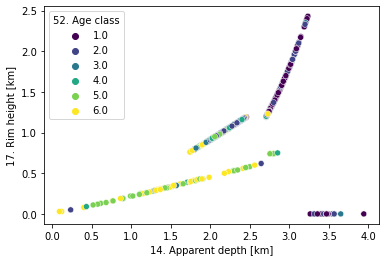

In [ ]:
sns.scatterplot(x=X['14. Apparent depth [km]'],y=X['17. Rim height [km]'],hue=y,palette='viridis')

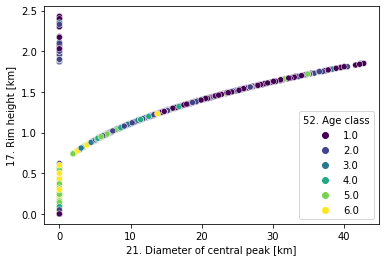

In [ ]:
sns.scatterplot(x=X['21. Diameter of central peak [km]'],y=X['17. Rim height [km]'],hue=y,palette='viridis')

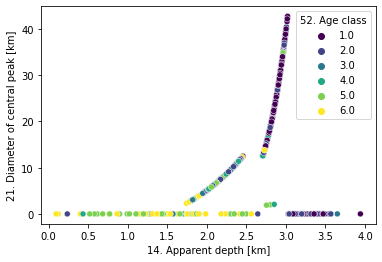

In [ ]:
sns.scatterplot(x=X['14. Apparent depth [km]'],y=X['21. Diameter of central peak [km]'],hue=y,palette='viridis')

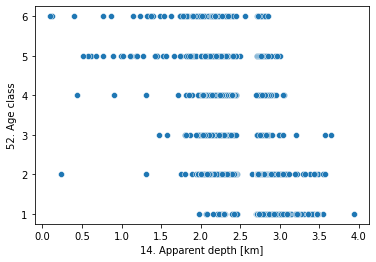

In [ ]:
sns.scatterplot(x=X['14. Apparent depth [km]'],y=y,palette='viridis')

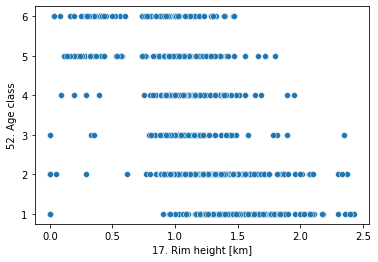

In [ ]:

sns.scatterplot(x=X['17. Rim height [km]'],y=y,palette='viridis') # there are outliers also there is no clear way to
#directly classify into classes

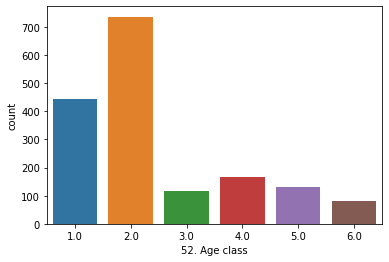

In [ ]:
sns.countplot(x=y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


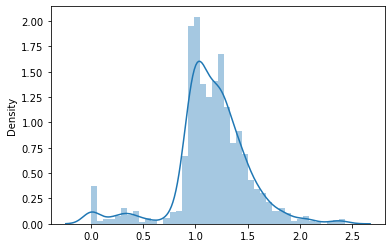

In [ ]:
sns.distplot(x=X['17. Rim height [km]'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


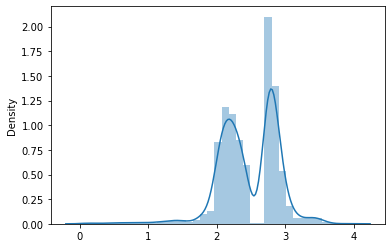

In [ ]:
sns.distplot(x=X['14. Apparent depth [km]'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


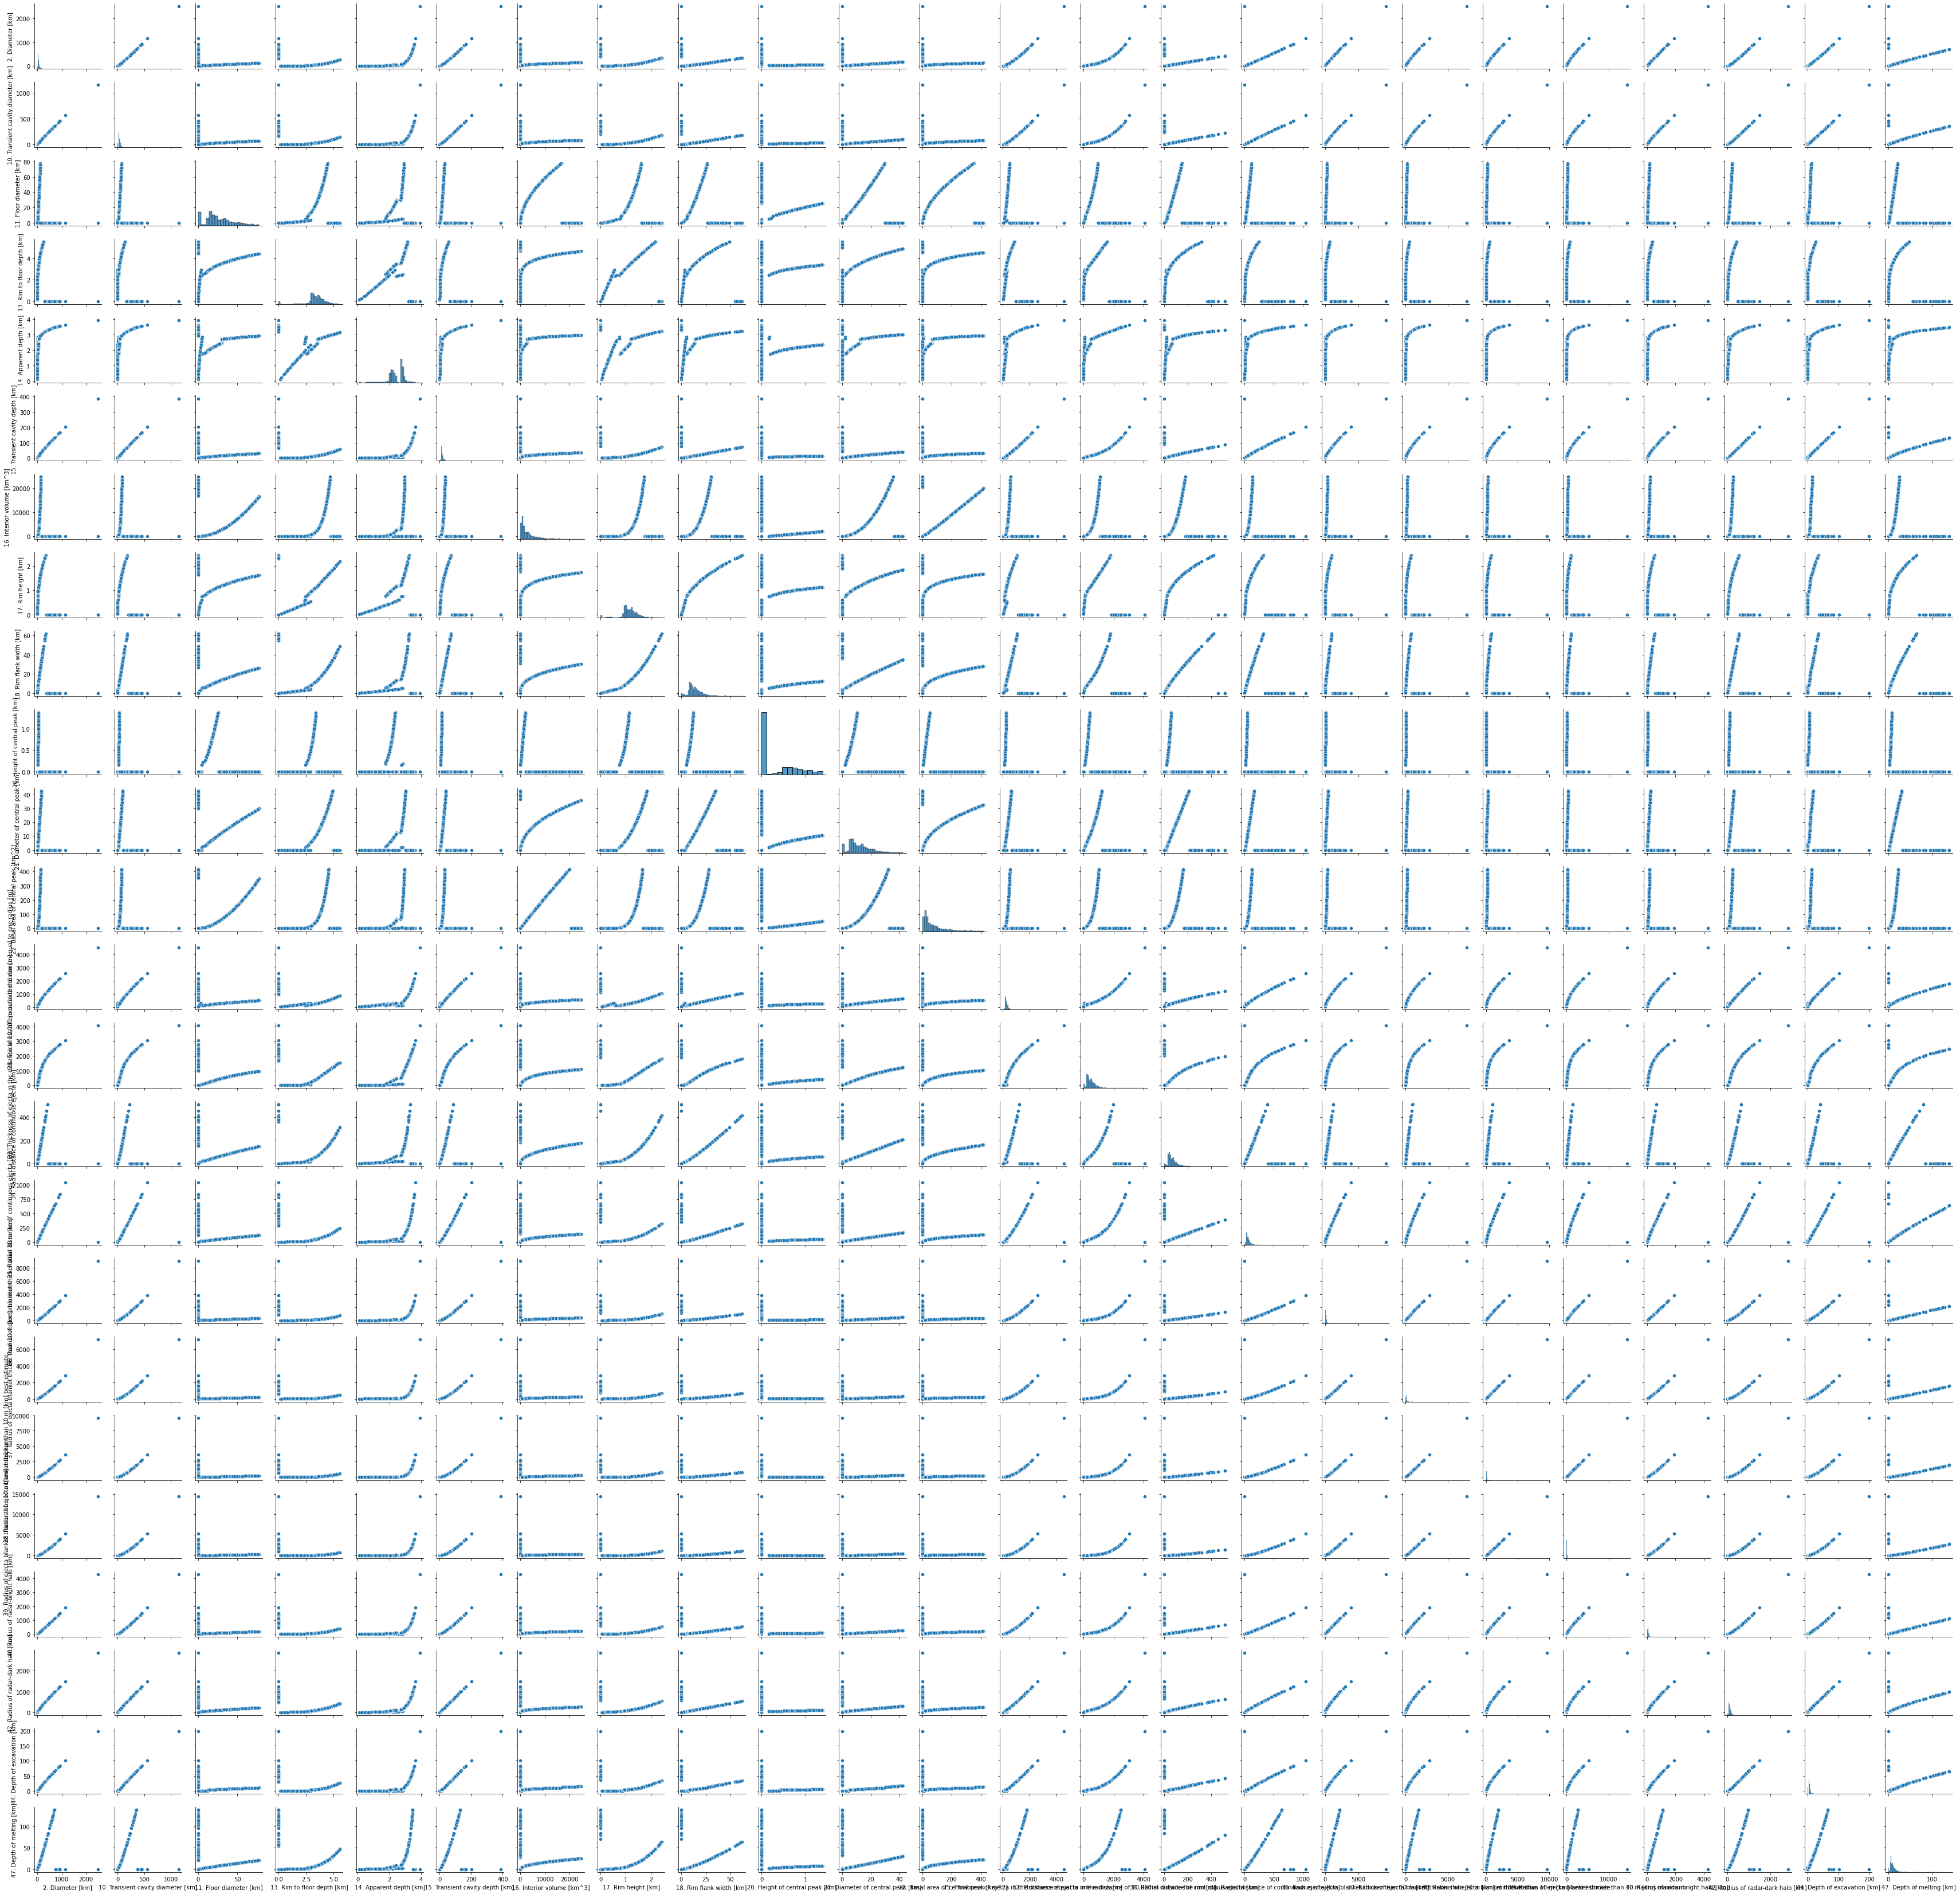

In [ ]:
sns.pairplot(X)  # we can see that there are outliers present and also the distributions of features are not standarrd dist

In [ ]:
num_columns=[]
cat_columns=[]
for i in df.columns:
  if df[i].dtype==str:
    cat_columns.append(i)
  else:
    num_columns.append(i)

In [ ]:
num_columns

['2. Diameter [km]',
 '10. Transient cavity diameter [km]',
 '11. Floor diameter [km]',
 '13. Rim to floor depth [km]',
 '14. Apparent depth [km]',
 '15. Transient cavity depth [km] ',
 '16. Interior volume [km^3]',
 '17. Rim height [km]',
 '18. Rim flank width [km]',
 '20. Height of central peak [km]',
 '21. Diameter of central peak [km]',
 '22. Basal area of central peak [km^2]',
 '25. Thickness of ejecta in the distance equal to one radius [m] ',
 '32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
 '34. Radial distance of continuous ejecta [km]',
 '35. Radial distance of continuous ejecta [km]',
 '36. Radius of ejecta blanket thicker than 10 m [km]',
 '37. Radius of ejecta blanket thicker than 10 m [km] minimum',
 '38. Radius of ejecta blanket thicker than 10 m [km] best estimate',
 '39. Radius of ejecta blanket thicker than 10 m [km] maximum',
 '40. Radius of radar-bright halo [km]',
 '42. Radius of radar-dark halo [km]',
 '44. Depth of excavation [km]',
 '4

In [ ]:
cat_columns

[]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

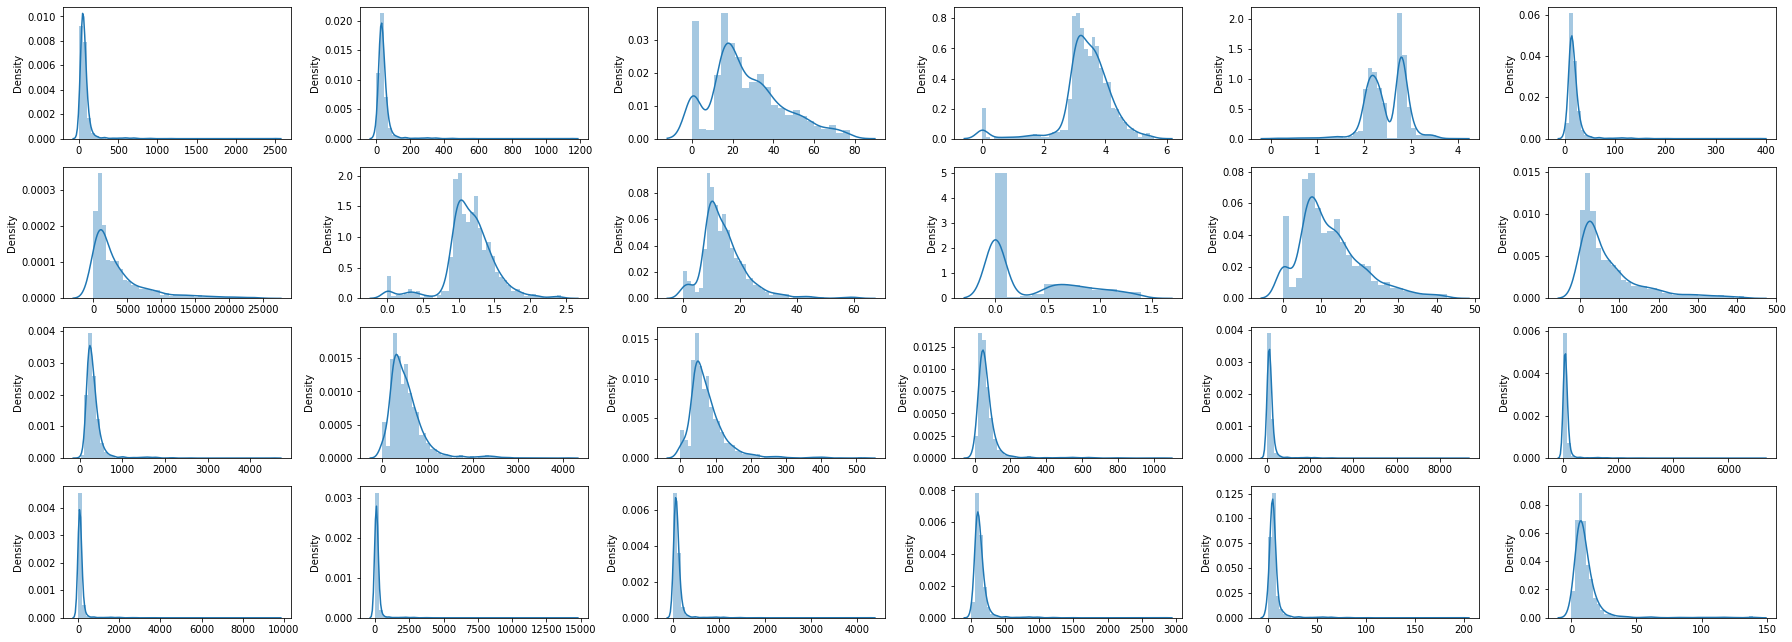

In [ ]:
plt.figure(figsize=(25,11))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.distplot(x=df[j])
  plt.tight_layout()

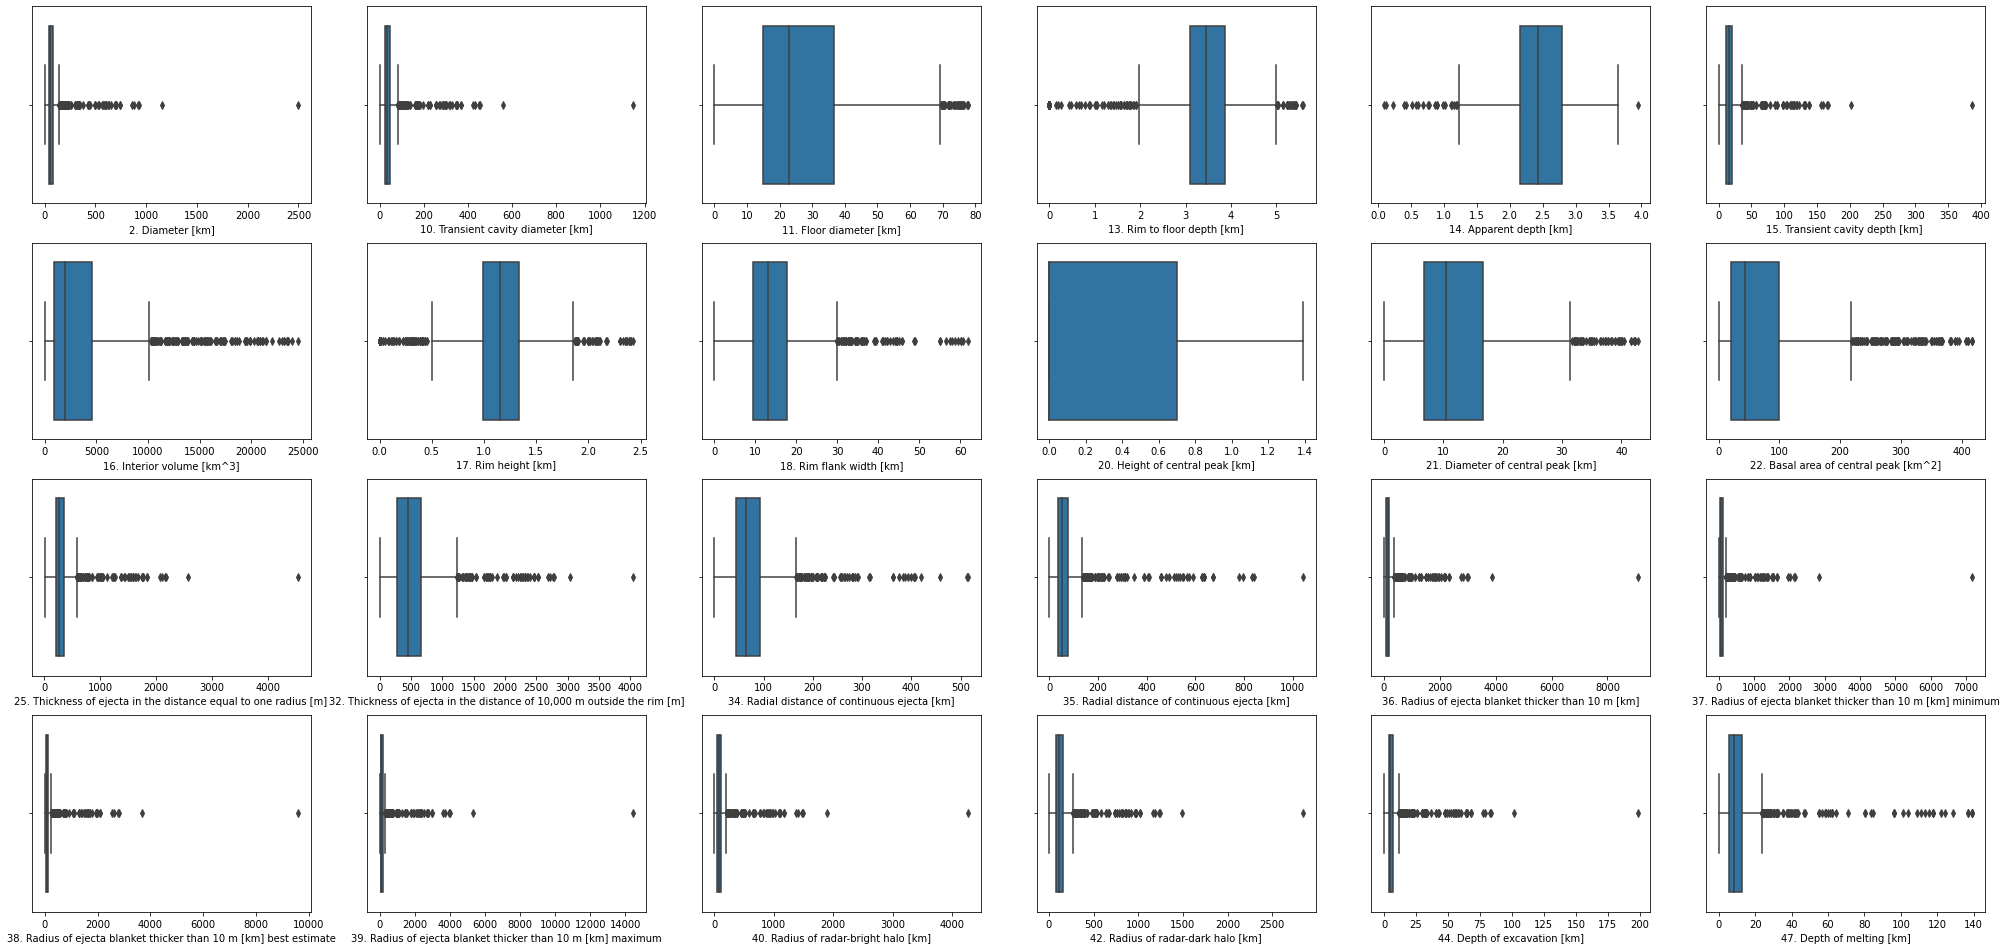

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=df[j])
  #plt.tight_layout()

In [ ]:
df['17. Rim height [km]'][(0.5<df['17. Rim height [km]']) & (df['17. Rim height [km]']>1.75)]

250     2.40
469     1.78
566     2.30
744     2.01
864     2.39
        ... 
8109    2.10
8301    1.84
8535    1.90
8537    2.03
8638    1.90
Name: 17. Rim height [km], Length: 65, dtype: float64

In [ ]:
df['47. Depth of melting [km]'][(df['47. Depth of melting [km]']>20)]

5        23.27
109      21.85
119      22.06
190     115.47
250      62.00
         ...  
8329     20.58
8535     32.54
8537     38.86
8638     32.58
8712     21.18
Name: 47. Depth of melting [km], Length: 158, dtype: float64

# From here on we have two ways to deal with outliers one is to remove them to remove max outliers then standardscale and then build  a model or lese w can use scaling methoids which make data ribust to outliers such as robust scaler

In [ ]:
# robust scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scale=RobustScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=y.dropna()

In [ ]:
X.to_csv('/content/drive/MyDrive/Lunar_age detection/X-23-col-raw')

In [ ]:
y.to_csv('/content/drive/MyDrive/Lunar_age detection/y-raw')

In [ ]:
y

0       2.0
5       1.0
7       2.0
13      2.0
14      1.0
       ... 
8686    2.0
8687    2.0
8688    1.0
8690    6.0
8712    1.0
Name: 52. Age class, Length: 1675, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=101)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)               # correcting imabalnced classes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_train=scale.fit_transform(X_train)

In [ ]:
X_test=scale.transform(X_test)

In [ ]:
len(X_train)

3792

In [ ]:
from sklearn.ensemble import RandomForestClassifier
base_mod=RandomForestClassifier(random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_mod=GridSearchCV(base_mod,param_grid={'n_estimators':[50,70,100,150,200],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'min_impurity_split':[0.1,0.2,0.3]},cv=5,scoring='accuracy')

NameError: ignored

In [ ]:
grid_mod.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: Futu

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [ ]:
grid_mod.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.3,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
forest_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.3,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
forest_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.3,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=forest_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve,plot_confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.39285714285714285

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.64      0.64        75
         2.0       0.44      0.32      0.37       104
         3.0       0.20      0.29      0.24        21
         4.0       0.12      0.14      0.13        28
         5.0       0.22      0.35      0.27        17
         6.0       0.17      0.29      0.21         7

    accuracy                           0.39       252
   macro avg       0.30      0.34      0.31       252
weighted avg       0.42      0.39      0.40       252



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
base_model=KNeighborsClassifier()

In [ ]:
grid_mod=GridSearchCV(base_model,param_grid={'n_neighbors':[5,10,15,20,25,30],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']},cv=10,scoring='accuracy')

NameError: ignored

In [ ]:
grid_mod.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

KeyboardInterrupt: ignored

In [ ]:
grid_mod.best_estimator_

NameError: ignored

In [ ]:
knn_model=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.43253968253968256

# using svc for 6 class predicttion

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_mod_all_classes=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svm_mod,param_grid={'C':[0.1,0.5,0.7,0.9],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 0.9], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.4444444444444444

# only predicting for nectarian and ppre nectarian ages

In [ ]:
X_preserved=X
y_preserved=y

In [ ]:
X_class_div=X
y_class_div=y

In [ ]:
X_outliers=X
y_outliers=y

In [ ]:
df['y']=y

In [ ]:
df['y'].value_counts()

2.0    736
1.0    442
4.0    168
5.0    131
3.0    118
6.0     80
Name: y, dtype: int64

In [ ]:
df_for_two_classes=df[(df['y']==1) | ((df['y']==2))]

In [ ]:
y=df_for_two_classes['y']

In [ ]:
X=df_for_two_classes.drop('y',axis=1)

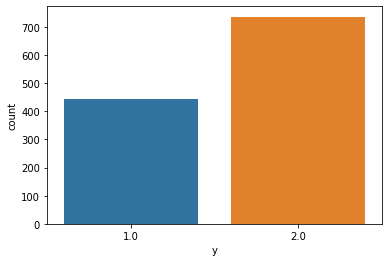

In [ ]:
sns.countplot(x=y)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=101)

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


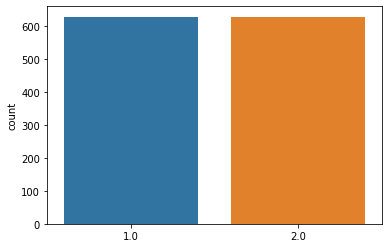

In [ ]:
sns.countplot(x=y_train)

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train=scale.fit_transform(X_train)

In [ ]:
X_test=scale.transform(X_test)

In [ ]:
svm_mod=SVC(random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_grid_mod=GridSearchCV(svm_mod,param_grid={'C':[0.1,0.5,0.7,0.9],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 0.9], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.7627118644067796

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.64      0.93      0.76        70
         2.0       0.93      0.65      0.77       107

    accuracy                           0.76       177
   macro avg       0.79      0.79      0.76       177
weighted avg       0.82      0.76      0.76       177



# Nectarian pre-nectarian and other class

In [ ]:
X_preserved

,2. Diameter [km],10. Transient cavity diameter [km],11. Floor diameter [km],13. Rim to floor depth [km],14. Apparent depth [km],15. Transient cavity depth [km],16. Interior volume [km^3],17. Rim height [km],18. Rim flank width [km],20. Height of central peak [km],21. Diameter of central peak [km],22. Basal area of central peak [km^2],25. Thickness of ejecta in the distance equal to one radius [m],"32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]",34. Radial distance of continuous ejecta [km],35. Radial distance of continuous ejecta [km],36. Radius of ejecta blanket thicker than 10 m [km],37. Radius of ejecta blanket thicker than 10 m [km] minimum,38. Radius of ejecta blanket thicker than 10 m [km] best estimate,39. Radius of ejecta blanket thicker than 10 m [km] maximum,40. Radius of radar-bright halo [km],42. Radius of radar-dark halo [km],44. Depth of excavation [km],47. Depth of melting [km]
0,63.98,37.37,33.70,3.65,2.732,17.16,3536.22,1.24,15.11,0.00,14.00,81.19,301.88,527.23,76.69,61.61,152.88,84.69,99.61,125.01,86.94,131.08,5.74,10.05
1,137.35,76.32,0.00,4.59,2.949,32.84,20651.96,1.68,28.61,0.00,33.00,0.00,531.32,1028.22,165.39,129.86,358.15,213.68,258.18,336.47,195.78,248.91,13.17,23.27
2,41.55,24.96,19.65,3.21,2.218,11.89,1304.60,1.04,10.53,0.93,8.19,31.54,219.34,316.72,49.68,40.43,94.50,50.20,58.15,71.45,54.96,91.24,3.97,6.26
3,54.13,31.97,27.35,3.47,2.404,14.88,2403.36,1.16,13.14,0.00,11.45,56.30,266.75,438.57,64.82,52.33,126.89,69.16,80.87,100.66,72.79,113.92,4.98,8.37
4,91.01,51.95,52.33,4.06,2.830,23.15,7981.28,1.43,20.28,0.00,21.00,175.65,391.82,740.64,109.32,86.90,226.40,129.79,154.56,197.38,126.43,176.20,7.74,14.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,66.88,38.95,35.62,3.70,2.744,17.82,3917.52,1.26,15.68,0.00,14.75,89.46,311.95,552.16,80.19,64.33,160.62,89.36,105.27,132.40,91.14,136.05,5.96,10.55
1671,61.20,35.85,31.88,3.60,2.720,16.52,3191.34,1.22,14.56,0.00,13.28,73.66,292.12,502.83,73.34,58.99,145.49,80.25,94.24,118.02,82.94,126.28,5.52,9.57
1672,66.76,38.89,35.54,3.70,2.744,17.79,3901.30,1.26,15.65,0.00,14.72,89.11,311.54,551.14,80.04,64.22,160.30,89.17,105.03,132.10,90.96,135.85,5.95,10.53
1673,63.18,36.93,33.17,3.64,2.729,16.97,3434.91,1.23,14.95,0.00,13.79,78.98,299.09,520.26,75.73,60.86,150.75,83.41,98.06,122.99,85.79,129.70,5.67,9.91


In [ ]:
y_preserved=y_preserved.replace([3,4,5,6],value=3)

In [ ]:
sns.countplot(x=y_preserved)

ValueError: ignored

In [ ]:
X_preserved=X_preserved.reset_index()

In [ ]:
y_preserved=y_preserved.reset_index()

In [ ]:
X_preserved=X_preserved.drop('index',axis=1)

In [ ]:
y_preserved=y_preserved.drop('index',axis=1)

In [ ]:
y_preserved.index

RangeIndex(start=0, stop=1675, step=1)

In [ ]:
y_preserved.shape

(1675, 1)

In [ ]:
X_preserved['14. Apparent depth [km]'].shape

(1675,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


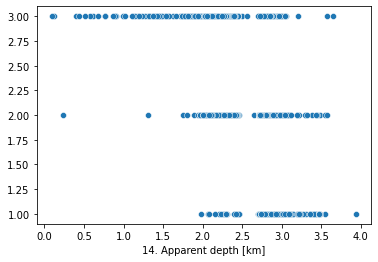

In [ ]:


sns.scatterplot(X_preserved['14. Apparent depth [km]'],y=np.array(y_preserved).reshape(1675))

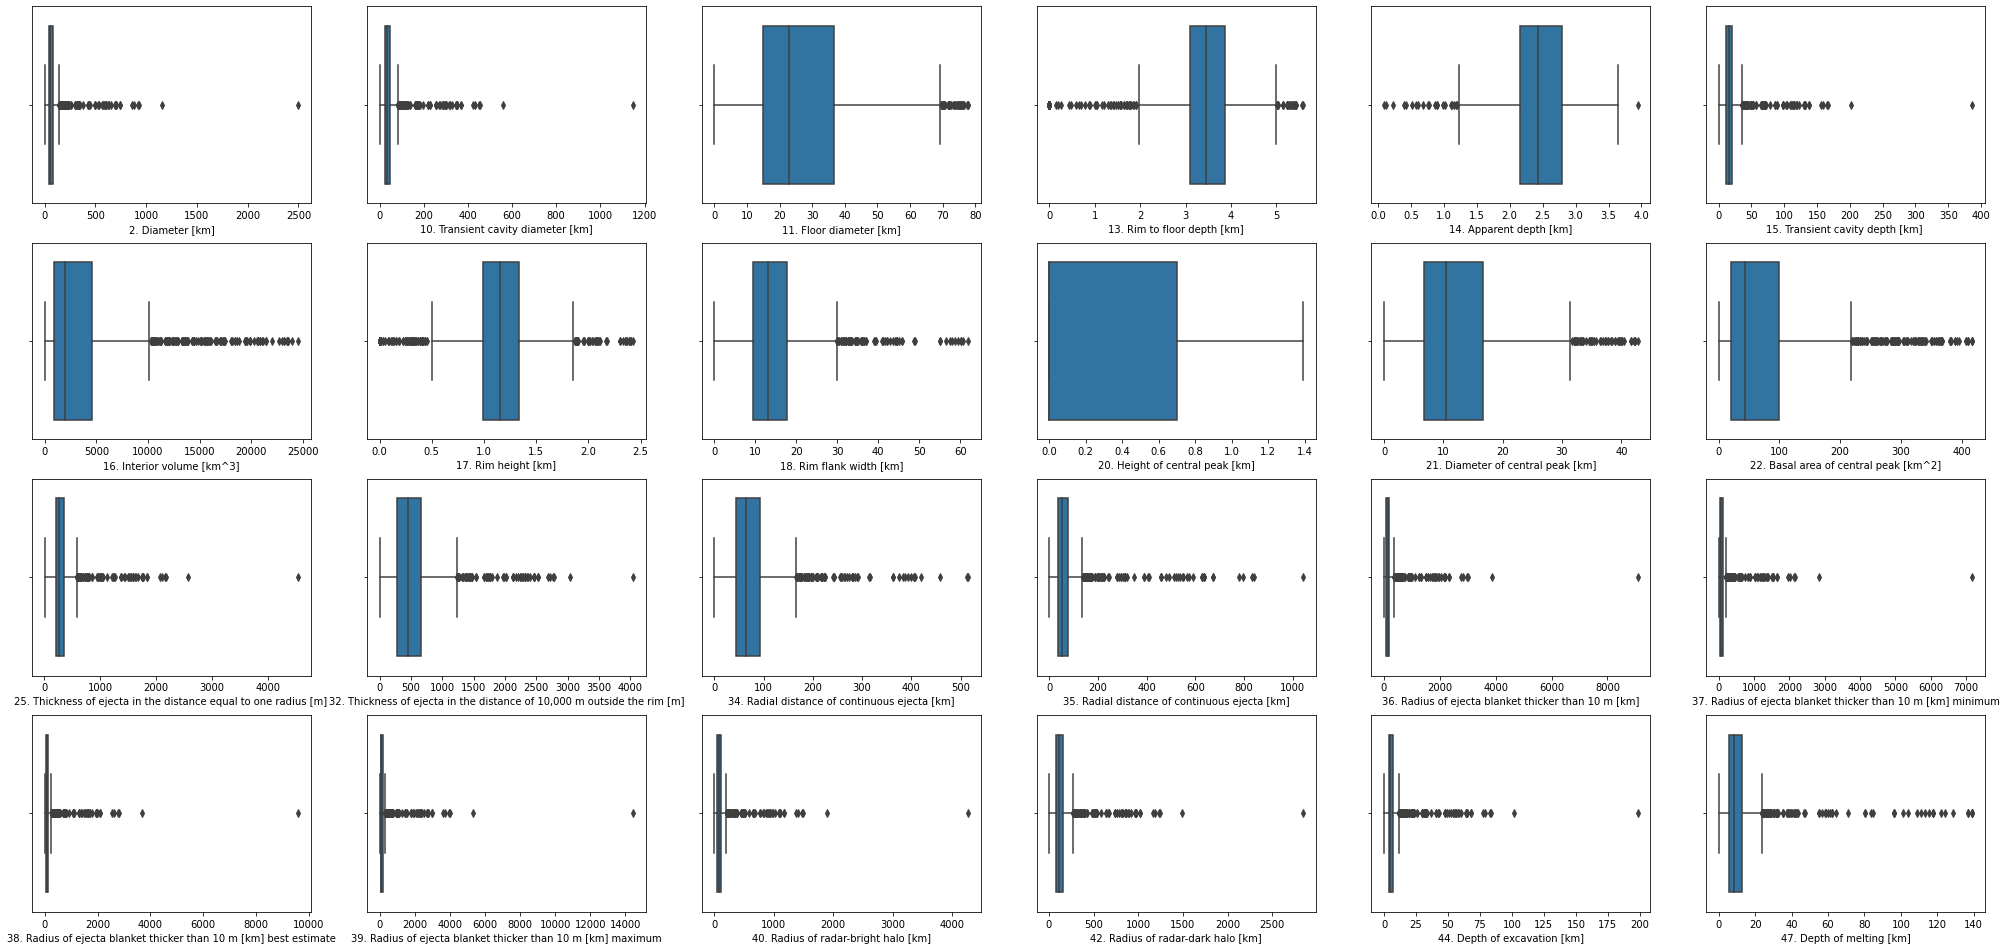

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=X[j])

In [ ]:
X_preserved.columns

Index(['2. Diameter [km]', '10. Transient cavity diameter [km]',
       '11. Floor diameter [km]', '13. Rim to floor depth [km]',
       '14. Apparent depth [km]', '15. Transient cavity depth [km] ',
       '16. Interior volume [km^3]', '17. Rim height [km]',
       '18. Rim flank width [km]', '20. Height of central peak [km]',
       '21. Diameter of central peak [km]',
       '22. Basal area of central peak [km^2]',
       '25. Thickness of ejecta in the distance equal to one radius [m] ',
       '32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]',
       '34. Radial distance of continuous ejecta [km]',
       '35. Radial distance of continuous ejecta [km]',
       '36. Radius of ejecta blanket thicker than 10 m [km]',
       '37. Radius of ejecta blanket thicker than 10 m [km] minimum',
       '38. Radius of ejecta blanket thicker than 10 m [km] best estimate',
       '39. Radius of ejecta blanket thicker than 10 m [km] maximum',
       '40. Radius of radar-bri

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_preserved, y_preserved, test_size=0.15, random_state=101)

In [ ]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()

In [ ]:
X_train=scale.fit_transform(X_train)

In [ ]:
X_test=scale.transform(X_test)

In [ ]:
# only  after scaing do the upsample or oversample cuase we dont want our repeated samples to hamper the scaling procedure by shifting statistical measures

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(y_train)

1896

In [ ]:
X_train['14. Apparent depth [km]']

IndexError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


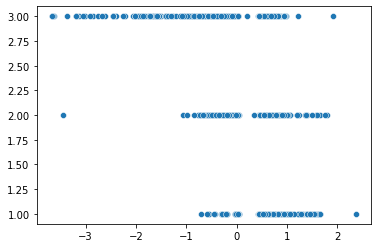

In [ ]:
sns.scatterplot(X_train[:,4],y=np.array(y_train).reshape(1896))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.6309523809523809

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.61      0.95      0.74        75
         2.0       0.63      0.51      0.56       104
         3.0       0.67      0.48      0.56        73

    accuracy                           0.63       252
   macro avg       0.64      0.65      0.62       252
weighted avg       0.64      0.63      0.62       252



In [ ]:
#### trying the version 2 with grid search

In [ ]:
svm_mod=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svm_mod,param_grid={'C':[0.1,0.01,0.9,0.99],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.9, 0.99], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.99, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod_2=SVC(C=0.99, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod_2.fit(X_train,y_train)

SVC(C=0.99, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod_2.predict(X_test)
accuracy_score(y_test,pred)

0.6468253968253969

# combining nect and pre nect ,lower and upper imbrian and last the coppernican age ..each representing a class

In [ ]:
X_class_div.head()

,2. Diameter [km],10. Transient cavity diameter [km],11. Floor diameter [km],13. Rim to floor depth [km],14. Apparent depth [km],15. Transient cavity depth [km],16. Interior volume [km^3],17. Rim height [km],18. Rim flank width [km],20. Height of central peak [km],21. Diameter of central peak [km],22. Basal area of central peak [km^2],25. Thickness of ejecta in the distance equal to one radius [m],"32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]",34. Radial distance of continuous ejecta [km],35. Radial distance of continuous ejecta [km],36. Radius of ejecta blanket thicker than 10 m [km],37. Radius of ejecta blanket thicker than 10 m [km] minimum,38. Radius of ejecta blanket thicker than 10 m [km] best estimate,39. Radius of ejecta blanket thicker than 10 m [km] maximum,40. Radius of radar-bright halo [km],42. Radius of radar-dark halo [km],44. Depth of excavation [km],47. Depth of melting [km]
0,63.98,37.37,33.70,3.65,2.732,17.16,3536.22,1.24,15.11,0.00,14.00,81.19,301.88,527.23,76.69,61.61,152.88,84.69,99.61,125.01,86.94,131.08,5.74,10.05
5,137.35,76.32,0.00,4.59,2.949,32.84,20651.96,1.68,28.61,0.00,33.00,0.00,531.32,1028.22,165.39,129.86,358.15,213.68,258.18,336.47,195.78,248.91,13.17,23.27
7,41.55,24.96,19.65,3.21,2.218,11.89,1304.60,1.04,10.53,0.93,8.19,31.54,219.34,316.72,49.68,40.43,94.50,50.20,58.15,71.45,54.96,91.24,3.97,6.26
13,54.13,31.97,27.35,3.47,2.404,14.88,2403.36,1.16,13.14,0.00,11.45,56.30,266.75,438.57,64.82,52.33,126.89,69.16,80.87,100.66,72.79,113.92,4.98,8.37
14,91.01,51.95,52.33,4.06,2.830,23.15,7981.28,1.43,20.28,0.00,21.00,175.65,391.82,740.64,109.32,86.90,226.40,129.79,154.56,197.38,126.43,176.20,7.74,14.81


In [ ]:
y_class_div=y_class_div.replace([1,2],1)

In [ ]:
y_class_div=y_class_div.replace([3,4],2)

In [ ]:
y_class_div=y_class_div.replace([5,6],3)

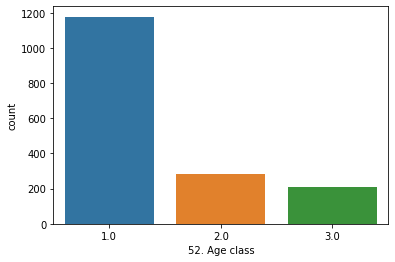

In [ ]:
sns.countplot(x=y_class_div)

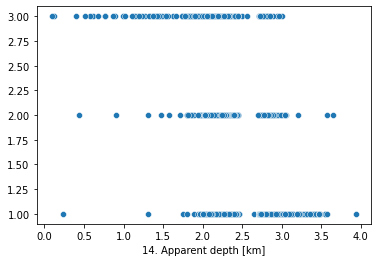

In [ ]:
sns.scatterplot(x=X_class_div['14. Apparent depth [km]'],y=np.array(y_class_div).reshape(1675))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_class_div, y_class_div, test_size=0.15, random_state=101)

In [ ]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()

In [ ]:
X_train=scale.fit_transform(X_train)

In [ ]:
X_test=scale.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)
accuracy_score(y_test,pred)

0.6587301587301587

In [ ]:
# trying the version 2 with grid search

In [ ]:
svm_mod=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svm_mod,param_grid={'C':[0.1,0.5,0.9,0.99],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.9, 0.99], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod_2=SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
svc_mod_2.fit(X_train,y_train)

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod_2.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.6666666666666666

In [ ]:
print(classification_report(y_test,pred))  # till mow one of the best results


              precision    recall  f1-score   support

         1.0       0.61      0.95      0.74        75
         2.0       0.66      0.51      0.58       104
         3.0       0.70      0.53      0.60        73

    accuracy                           0.65       252
   macro avg       0.66      0.66      0.64       252
weighted avg       0.66      0.65      0.63       252



In [ ]:
from pandas.core.common import random_state
knn_model=KNeighborsClassifier()

In [ ]:
grid_mod=GridSearchCV(knn_model,param_grid={'n_neighbors':[5,10,15,20,25,30],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']},cv=10,scoring='accuracy')

In [ ]:
grid_mod.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_mod.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
knn_mod=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
knn_mod.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
accuracy_score(y_test,knn_mod.predict(X_test))

0.6071428571428571

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
X_pca=pca.fit_transform(X_train)

In [ ]:
pca.explained_variance_ratio_

array([0.96469791, 0.02999714])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


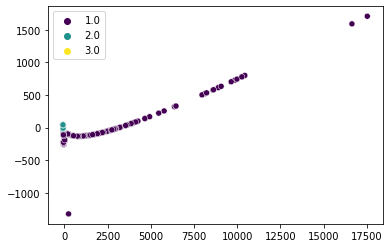

In [ ]:
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=y_train,palette='viridis')

# testing on the three class data by filling missing classes by using knn

In [ ]:
df_missing=df_raw[df_raw['52. Age class'].isnull()]


In [ ]:
len(df_missing)

7041

In [ ]:
y_missing=df_missing['52. Age class']

In [ ]:
X_missing=df_missing[df.columns]

In [ ]:
scale.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
scale=RobustScaler()

In [ ]:

X_missing_scaled=scale.transform(X_missing)

In [ ]:
labels=knn_mod.predict(X_missing_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


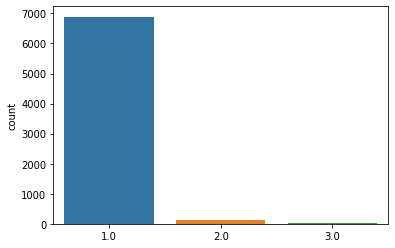

In [ ]:
sns.countplot(labels)

In [ ]:
X_new=np.concatenate((X_train,X_missing),axis=0)

In [ ]:
y_new=np.concatenate((y_train,labels),axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=101)

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


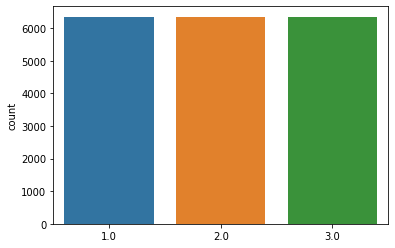

In [ ]:
sns.countplot(y_train)

In [ ]:
mod=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
mod.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_pred=mod.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9423320659062104

# removing outliers then training the dataset

In [ ]:
X_outliers

,2. Diameter [km],10. Transient cavity diameter [km],11. Floor diameter [km],13. Rim to floor depth [km],14. Apparent depth [km],15. Transient cavity depth [km],16. Interior volume [km^3],17. Rim height [km],18. Rim flank width [km],20. Height of central peak [km],21. Diameter of central peak [km],22. Basal area of central peak [km^2],25. Thickness of ejecta in the distance equal to one radius [m],"32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]",34. Radial distance of continuous ejecta [km],35. Radial distance of continuous ejecta [km],36. Radius of ejecta blanket thicker than 10 m [km],37. Radius of ejecta blanket thicker than 10 m [km] minimum,38. Radius of ejecta blanket thicker than 10 m [km] best estimate,39. Radius of ejecta blanket thicker than 10 m [km] maximum,40. Radius of radar-bright halo [km],42. Radius of radar-dark halo [km],44. Depth of excavation [km],47. Depth of melting [km]
0,63.98,37.37,33.70,3.65,2.732,17.16,3536.22,1.24,15.11,0.00,14.00,81.19,301.88,527.23,76.69,61.61,152.88,84.69,99.61,125.01,86.94,131.08,5.74,10.05
5,137.35,76.32,0.00,4.59,2.949,32.84,20651.96,1.68,28.61,0.00,33.00,0.00,531.32,1028.22,165.39,129.86,358.15,213.68,258.18,336.47,195.78,248.91,13.17,23.27
7,41.55,24.96,19.65,3.21,2.218,11.89,1304.60,1.04,10.53,0.93,8.19,31.54,219.34,316.72,49.68,40.43,94.50,50.20,58.15,71.45,54.96,91.24,3.97,6.26
13,54.13,31.97,27.35,3.47,2.404,14.88,2403.36,1.16,13.14,0.00,11.45,56.30,266.75,438.57,64.82,52.33,126.89,69.16,80.87,100.66,72.79,113.92,4.98,8.37
14,91.01,51.95,52.33,4.06,2.830,23.15,7981.28,1.43,20.28,0.00,21.00,175.65,391.82,740.64,109.32,86.90,226.40,129.79,154.56,197.38,126.43,176.20,7.74,14.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,66.88,38.95,35.62,3.70,2.744,17.82,3917.52,1.26,15.68,0.00,14.75,89.46,311.95,552.16,80.19,64.33,160.62,89.36,105.27,132.40,91.14,136.05,5.96,10.55
8687,61.20,35.85,31.88,3.60,2.720,16.52,3191.34,1.22,14.56,0.00,13.28,73.66,292.12,502.83,73.34,58.99,145.49,80.25,94.24,118.02,82.94,126.28,5.52,9.57
8688,66.76,38.89,35.54,3.70,2.744,17.79,3901.30,1.26,15.65,0.00,14.72,89.11,311.54,551.14,80.04,64.22,160.30,89.17,105.03,132.10,90.96,135.85,5.95,10.53
8690,63.18,36.93,33.17,3.64,2.729,16.97,3434.91,1.23,14.95,0.00,13.79,78.98,299.09,520.26,75.73,60.86,150.75,83.41,98.06,122.99,85.79,129.70,5.67,9.91


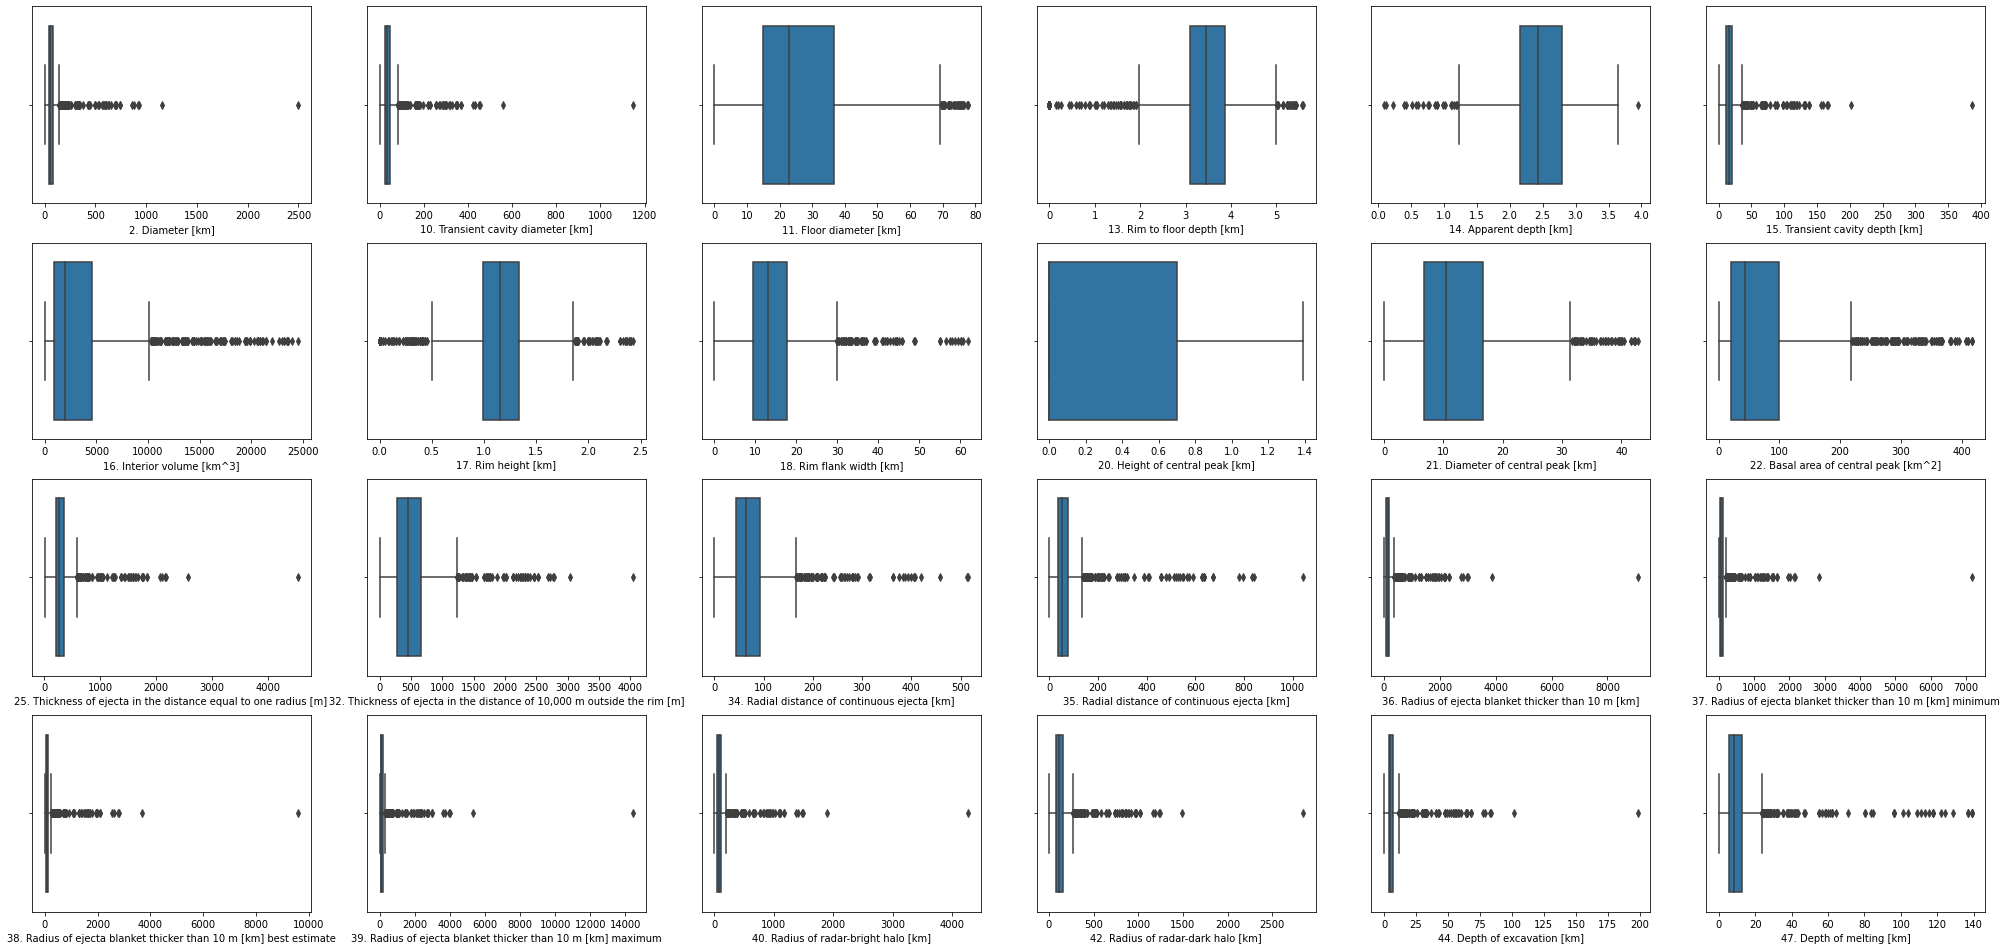

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=X_outliers[j])

In [ ]:
X_outliers.corrwith(y_outliers).sort_values()

14. Apparent depth [km]                                                   -0.521474
17. Rim height [km]                                                       -0.415854
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.414595
18. Rim flank width [km]                                                  -0.400844
21. Diameter of central peak [km]                                         -0.396237
34. Radial distance of continuous ejecta [km]                             -0.367290
22. Basal area of central peak [km^2]                                     -0.325900
16. Interior volume [km^3]                                                -0.321663
13. Rim to floor depth [km]                                               -0.319935
11. Floor diameter [km]                                                   -0.315184
47. Depth of melting [km]                                                 -0.293626
25. Thickness of ejecta in the distance equal to one radius [m]           -0

In [ ]:
app_depth=X_outliers[(X_outliers['14. Apparent depth [km]']>3.5) | (X_outliers['14. Apparent depth [km]']<1.25)]['14. Apparent depth [km]']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


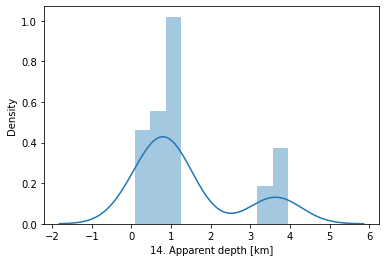

In [ ]:
sns.distplot(app_depth)

In [ ]:
X_outliers['14. Apparent depth [km]'].describe()

count    1675.000000
mean        2.471432
std         0.430679
min         0.093000
25%         2.163000
50%         2.427000
75%         2.796500
max         3.942000
Name: 14. Apparent depth [km], dtype: float64

In [ ]:
X_outliers=X_outliers.drop(app_depth.index,axis=0)

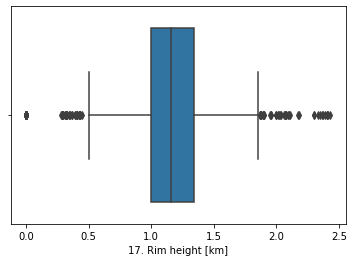

In [ ]:
sns.boxplot(x=X_outliers['17. Rim height [km]'])

In [ ]:
rim_height=X_outliers[(X_outliers['17. Rim height [km]']>1.75) | (X_outliers['17. Rim height [km]']<0.5)]['17. Rim height [km]']

In [ ]:
X_outliers['17. Rim height [km]'].describe()

count    1647.000000
mean        1.175258
std         0.327893
min         0.000000
25%         1.000000
50%         1.160000
75%         1.340000
max         2.430000
Name: 17. Rim height [km], dtype: float64

In [ ]:
len(rim_height)

128

In [ ]:
X_outliers=X_outliers.drop(rim_height.index,axis=0)

In [ ]:
th_ejecta=X_outliers[(X_outliers['32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]']>1250) ]['32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]']

In [ ]:
len(th_ejecta)

0

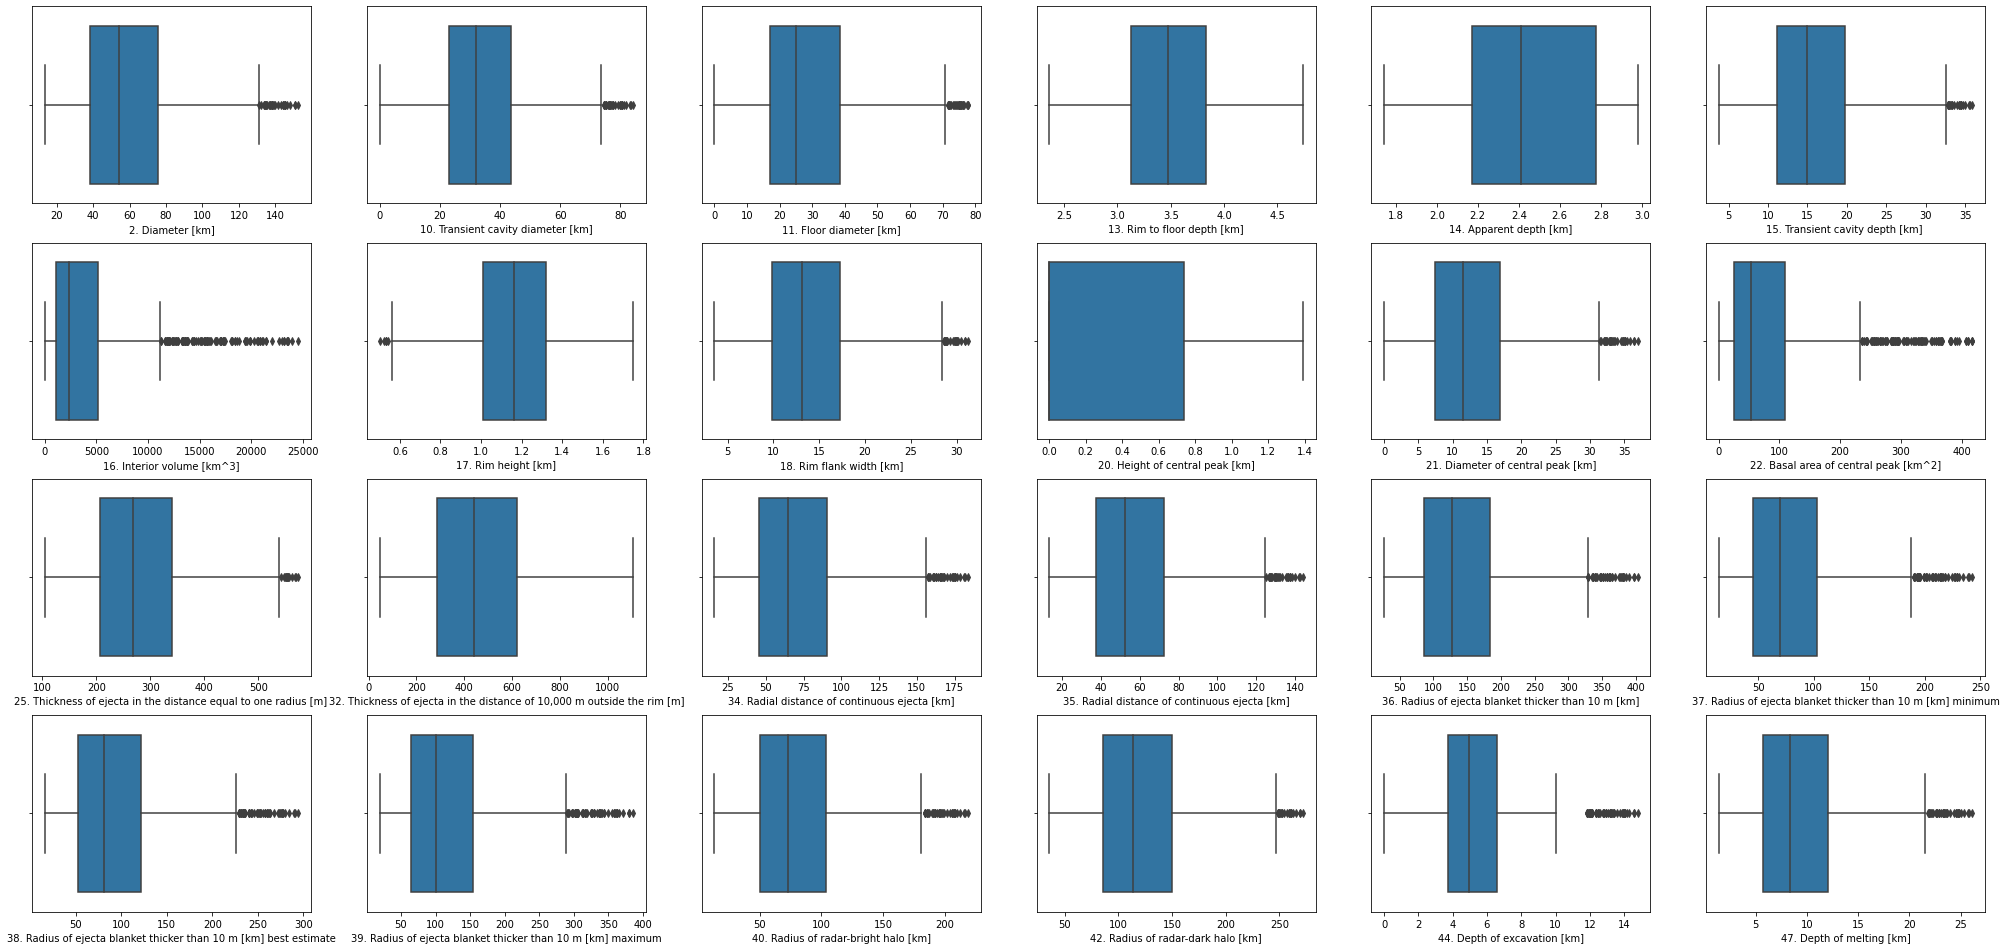

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=X_outliers[j])

In [ ]:
X_outliers.corrwith(y_outliers).sort_values()

17. Rim height [km]                                                       -0.451247
13. Rim to floor depth [km]                                               -0.446357
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.435158
44. Depth of excavation [km]                                              -0.429249
18. Rim flank width [km]                                                  -0.426099
15. Transient cavity depth [km]                                           -0.425181
42. Radius of radar-dark halo [km]                                        -0.425049
14. Apparent depth [km]                                                   -0.425048
10. Transient cavity diameter [km]                                        -0.423029
21. Diameter of central peak [km]                                         -0.417767
35. Radial distance of continuous ejecta [km]                             -0.417552
2. Diameter [km]                                                          -0

In [ ]:
depth_ex=X_outliers[(X_outliers['44. Depth of excavation [km]']>10) ]['44. Depth of excavation [km]']

In [ ]:
len(depth_ex)

55

In [ ]:
X_outliers=X_outliers.drop(depth_ex.index,axis=0)

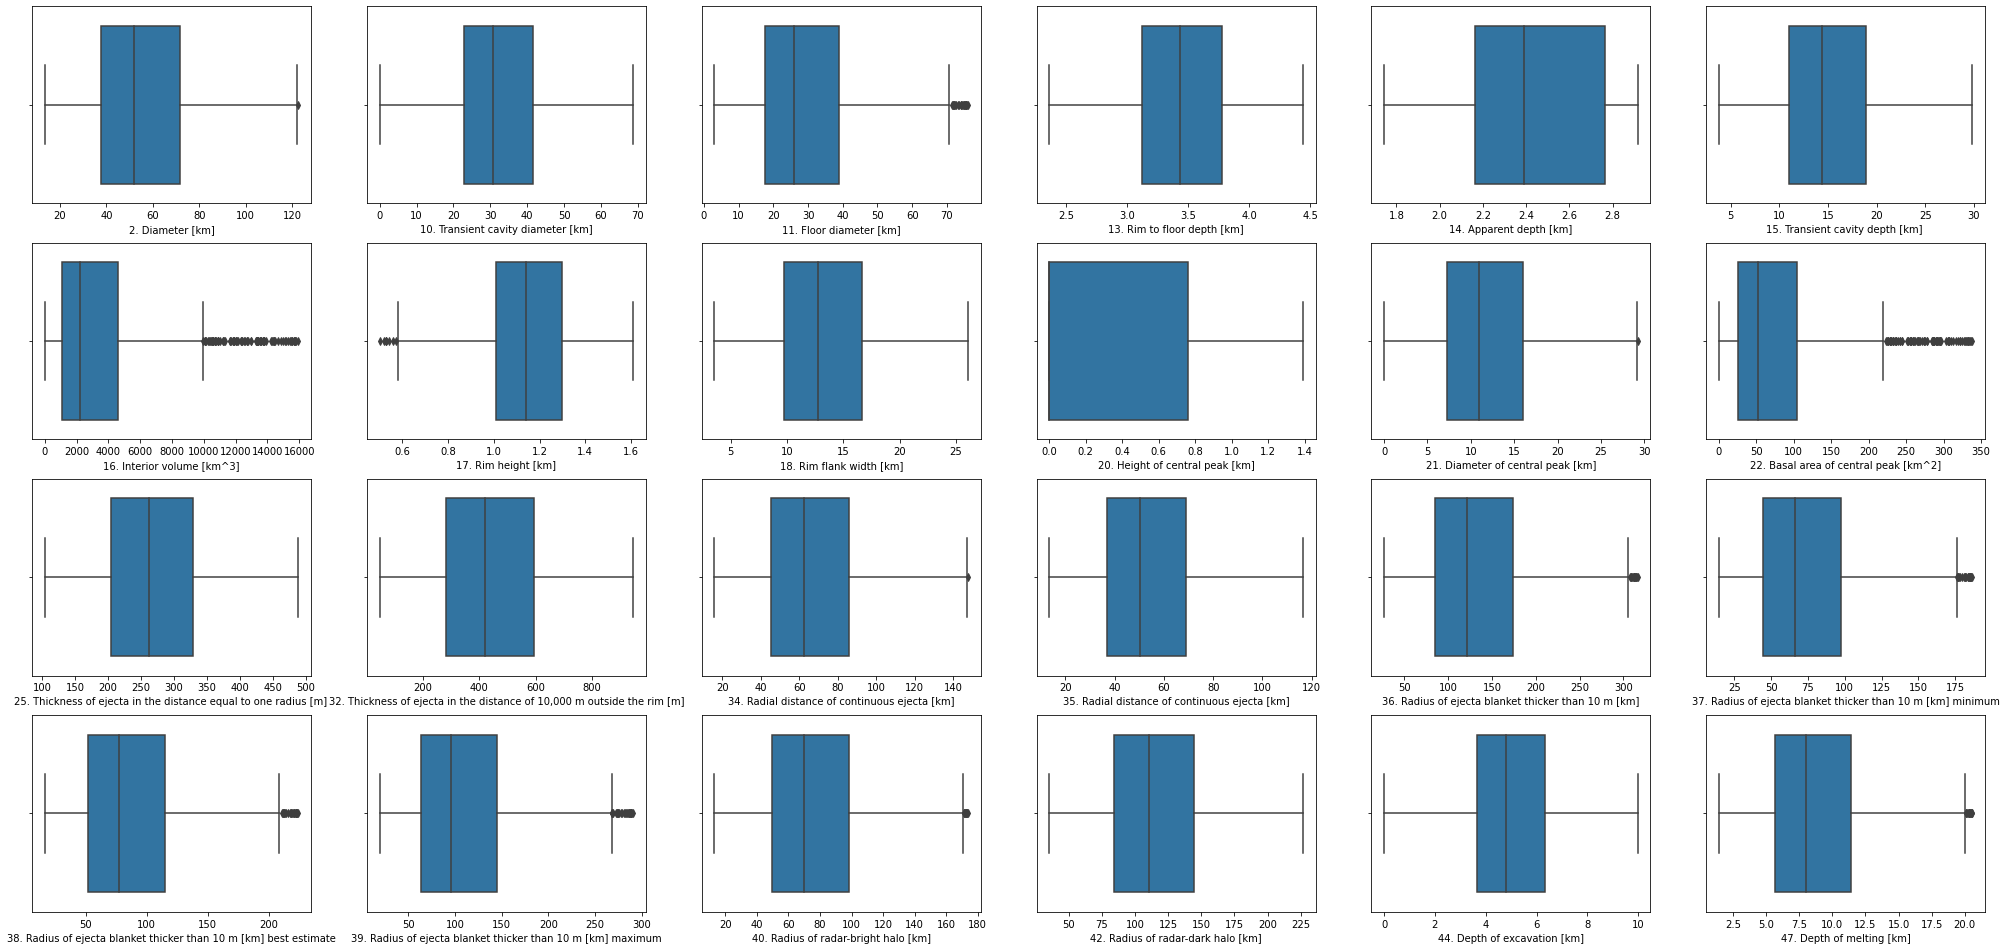

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=X_outliers[j])

In [ ]:
int_vol=X_outliers[(X_outliers['16. Interior volume [km^3]']>10000) ]['16. Interior volume [km^3]']  # we can either drop t hat col or remove the outliers so lets first remove outliers

In [ ]:
X_outliers=X_outliers.drop(int_vol.index,axis=0)

In [ ]:
X_outliers.shape

(1372, 24)

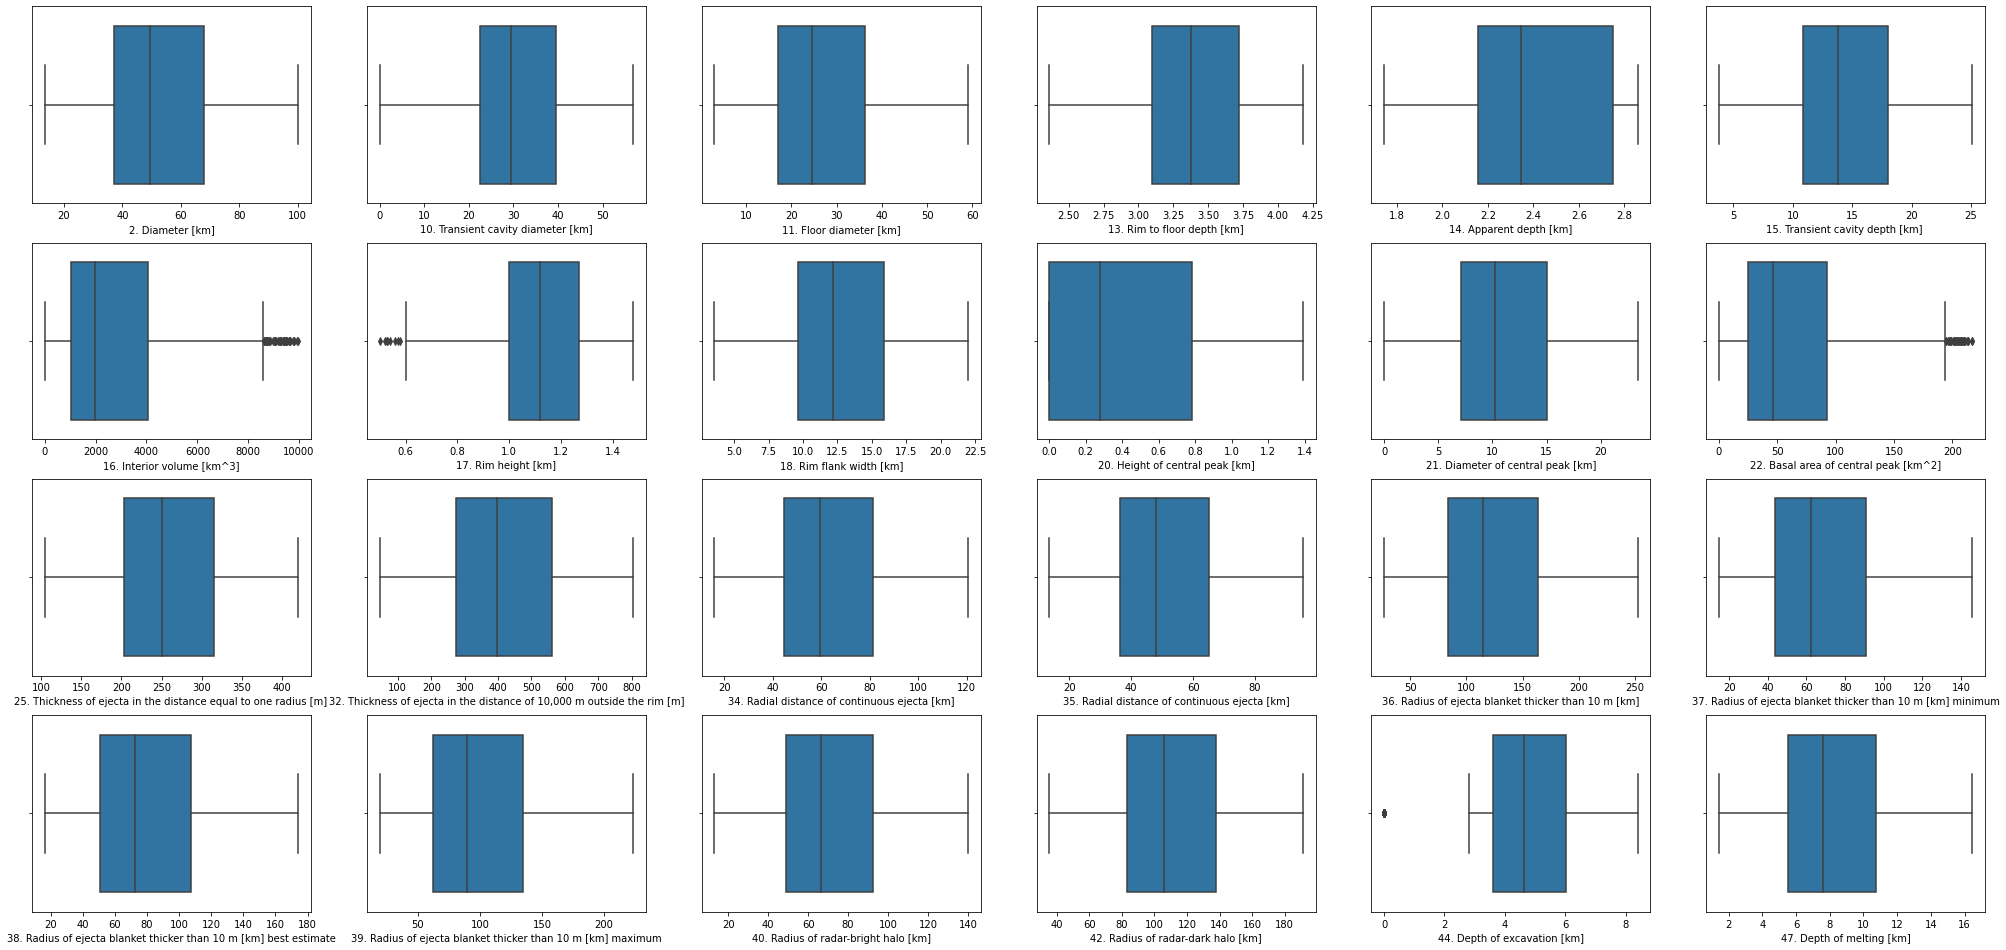

In [ ]:
plt.figure(figsize=(35,21))
for i,j in enumerate(num_columns):
  plt.subplot(5,6,i+1)
  sns.boxplot(x=X_outliers[j])

In [ ]:
X_outliers.corrwith(y_outliers).sort_values()

44. Depth of excavation [km]                                              -0.444857
17. Rim height [km]                                                       -0.437334
13. Rim to floor depth [km]                                               -0.429728
32. Thickness of ejecta in the distance of 10,000 m outside the rim [m]   -0.421085
18. Rim flank width [km]                                                  -0.419488
15. Transient cavity depth [km]                                           -0.418804
10. Transient cavity diameter [km]                                        -0.418752
42. Radius of radar-dark halo [km]                                        -0.418298
21. Diameter of central peak [km]                                         -0.414398
35. Radial distance of continuous ejecta [km]                             -0.413324
2. Diameter [km]                                                          -0.412436
34. Radial distance of continuous ejecta [km]                             -0

In [ ]:
y_outliers=y_outliers[X_outliers.index]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


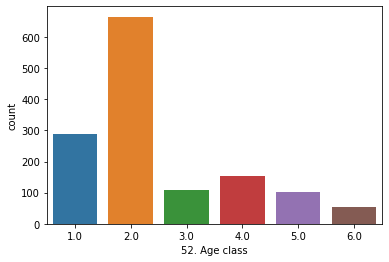

In [ ]:
sns.countplot(y_outliers)

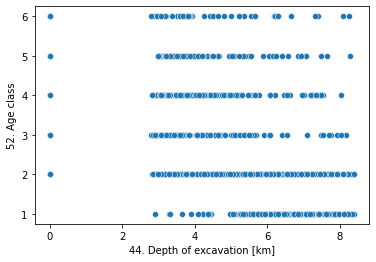

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(random_state=101,n_components=2)

In [ ]:
decomp_feat=pca.fit_transform(X=X_outliers)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


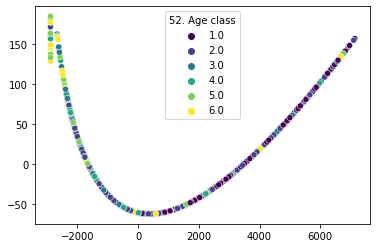

In [ ]:
sns.scatterplot(decomp_feat[:,0],decomp_feat[:,1],hue=y_outliers,palette='viridis')

In [ ]:
decomp_feat

array([[  685.75270016,   -61.54511756],
       [-1560.28148631,    -6.98620148],
       [ -452.58141359,   -54.52957927],
       ...,
       [  339.46831289,   -62.34795431],
       [ 1052.12490396,   -58.52029848],
       [  584.0503726 ,   -62.00740335]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_outliers, y_outliers, test_size=0.10, random_state=101)

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


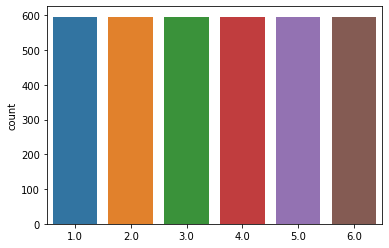

In [ ]:
sns.countplot(y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stand_scale=StandardScaler()

In [ ]:
X_train=stand_scale.fit_transform(X_train)

In [ ]:
X_test=stand_scale.transform(X_test)

In [ ]:
svc_mod=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svc_mod,param_grid={'C':[0.1,0.5,0.7,0.9],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 0.9], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod=SVC(C=0.99, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.99, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.34782608695652173

## Min max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
stand_scale=MinMaxScaler()

In [ ]:
X_train=stand_scale.fit_transform(X_train)

In [ ]:
X_test=stand_scale.transform(X_test)

In [ ]:
svc_mod=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svc_mod,param_grid={'C':[0.1,0.5,0.7,0.9],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 0.9], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.34782608695652173

## New and old age

In [ ]:
y_newold=y_outliers.replace([1,2,3],1)

In [ ]:
y_newold=y_newold.replace([4,5,6],2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


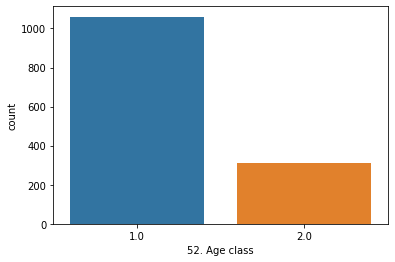

In [ ]:
sns.countplot(y_newold)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_outliers, y_newold, test_size=0.15, random_state=101)

In [ ]:
svc_mod_1=SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod_1.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod_1.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.6262135922330098

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.87      0.59      0.70       154
         2.0       0.38      0.73      0.50        52

    accuracy                           0.63       206
   macro avg       0.62      0.66      0.60       206
weighted avg       0.74      0.63      0.65       206



In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stand_scale=StandardScaler()

In [ ]:
X_train=stand_scale.fit_transform(X_train)

In [ ]:
X_test=stand_scale.transform(X_test)

In [ ]:
svc_mod=SVC(random_state=101)

In [ ]:
svc_grid_mod=GridSearchCV(svc_mod,param_grid={'C':[0.1,0.5,0.7,0.9],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[2,3,5],'gamma':['scale', 'auto']},cv=5,scoring='accuracy')

In [ ]:
svc_grid_mod.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=101, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.7, 0.9], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
svc_grid_mod.best_estimator_

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod=SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.6747572815533981

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.87      0.67      0.75       154
         2.0       0.41      0.69      0.52        52

    accuracy                           0.67       206
   macro avg       0.64      0.68      0.64       206
weighted avg       0.75      0.67      0.69       206



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6213592233009708

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.78      0.69      0.73       154
         2.0       0.31      0.40      0.35        52

    accuracy                           0.62       206
   macro avg       0.54      0.55      0.54       206
weighted avg       0.66      0.62      0.64       206



In [ ]:
def predict(X_test,y_test):
  y_pred=[]
  pred1=svc_mod_1.predict(X_test)
  pred2=svc_mod.predict(X_test)
  pred3=knn_model.predict(X_test)
  pred=zip(pred1,pred2,pred3)
  for i in pred:
    count1=0
    count2=0
    for j in i:
      if j==1:
        count1+=1
      else:
        count2+=1
    #print(ans)
    if count1>count2:
      y_pred.append(1)
    else:
      y_pred.append(2)

  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

In [ ]:
predict(X_test,y_test)

0.6262135922330098
              precision    recall  f1-score   support

         1.0       0.87      0.59      0.70       154
         2.0       0.38      0.73      0.50        52

    accuracy                           0.63       206
   macro avg       0.62      0.66      0.60       206
weighted avg       0.74      0.63      0.65       206



## 3 class classificatio  after outlier removal

In [ ]:
X_class_div=X_outliers

In [ ]:
y_class_div=y_outliers.replace([1,2],1)

In [ ]:
y_class_div=y_class_div.replace([3,4],2)

In [ ]:
y_class_div=y_class_div.replace([5,6],3)

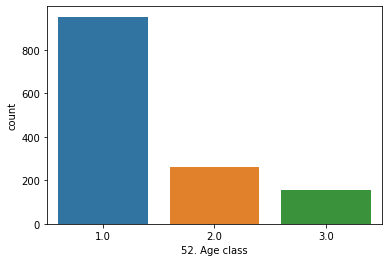

In [ ]:
sns.countplot(x=y_class_div)

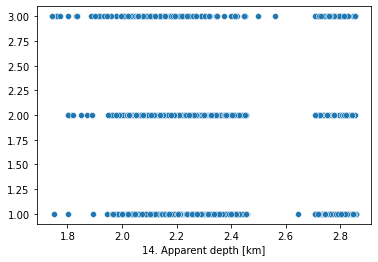

In [ ]:
sns.scatterplot(x=X_class_div['14. Apparent depth [km]'],y=np.array(y_class_div).reshape(-1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_class_div, y_class_div, test_size=0.15, random_state=101,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [ ]:
X_train=scale.fit_transform(X_train)

In [ ]:
X_test=scale.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svc_mod=SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_mod.fit(X_train,y_train)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
pred=svc_mod.predict(X_test)
accuracy_score(y_test,pred)

0.5388349514563107

# CONCLUSION --> here removing outliers isnt giving good resukst as we are lossing 20 percent of the data after outlier removal hence robust scalar is  optimal for such a small dataset.Also teh best results were produced with best generalization capability when we used robust scaler with three classes which are old craters middle aged craters and the new craters its accuracy was 67.8 percent with a very good generalization ability as all these tests were done under strict test data set which had the same dist as our original input and no oversamples or no type of data leakage was there in the test set

## classifying only nectarian and prenectarian with robust scaler==74 % accuracy
## classifying nect pre nect and other class =64 %
## classifying only three class old,mid,new with robust scaler=66.6%